# Análisis Exploratorio y Visualización (Tips dataset)

## Importando librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Cargar los datos (el dataset)

In [2]:
xlsTips = 'tips.xlsx'
dfTips = pd.read_excel(xlsTips)
dfTips.head(n=2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
dfTips = sns.load_dataset('tips')
dfTips.head(n=2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## Análisis de los datos (datasets)

In [4]:
dfTips.shape

(244, 7)

In [5]:
dfTips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [6]:
dfTips.index

RangeIndex(start=0, stop=244, step=1)

In [7]:
dfTips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
dfTips.dtypes.value_counts()

float64     2
category    1
int64       1
category    1
category    1
category    1
dtype: int64

In [9]:
dfTips.head(n=3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [10]:
dfTips.tail(n=3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [11]:
print(dfTips.iloc[2, 1], dfTips.iloc[2, 2])

3.5 Male


In [12]:
print(dfTips.loc[2, 'tip'], dfTips.loc[2, 'sex'])

3.5 Male


In [13]:
print(dfTips.iloc[0], dfTips.iloc[-1], sep='\n\n')

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

total_bill     18.78
tip                3
sex           Female
smoker            No
day             Thur
time          Dinner
size               2
Name: 243, dtype: object


In [14]:
dfTips.iloc[[0, 49, 99]]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
49,18.04,3.00,Male,No,Sun,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [15]:
dfTips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
print('variables: ', dfTips.columns, end='\n\n')
print('sex: ', dfTips.sex.unique(), end='\n\n')
print('smoker: ', dfTips['smoker'].unique(), end='\n\n')
print('day: ', dfTips.day.unique(), end='\n\n')
print('time: ', dfTips.time.unique(), end='\n\n')
print('size: ', dfTips['size'].unique(), end='\n\n')

variables:  Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

sex:  [Female, Male]
Categories (2, object): [Female, Male]

smoker:  [No, Yes]
Categories (2, object): [No, Yes]

day:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

time:  [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

size:  [2 3 4 1 6 5]



In [17]:
print(dfTips['sex'].value_counts(), end='\n\n')
print(dfTips['smoker'].value_counts(), end='\n\n')
print(dfTips['day'].value_counts(), end='\n\n')
print(dfTips['time'].value_counts(), end='\n\n')
print(dfTips['size'].value_counts(), end='\n\n')

Male      157
Female     87
Name: sex, dtype: int64

No     151
Yes     93
Name: smoker, dtype: int64

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Dinner    176
Lunch      68
Name: time, dtype: int64

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64



In [18]:
dfTipsFemale = dfTips.query('sex == "Female"')
dfTipsMale = dfTips.query('sex == "Male"')
pd.concat([dfTipsFemale.head().reset_index(),
          dfTipsMale.head().reset_index()], axis=1, keys=['Female', 'Male'])

Female                                                    Male             \
   index total_bill   tip     sex smoker  day    time size index total_bill   
0      0      16.99  1.01  Female     No  Sun  Dinner    2     1      10.34   
1      4      24.59  3.61  Female     No  Sun  Dinner    4     2      21.01   
2     11      35.26  5.00  Female     No  Sun  Dinner    4     3      23.68   
3     14      14.83  3.02  Female     No  Sun  Dinner    2     5      25.29   
4     16      10.33  1.67  Female     No  Sun  Dinner    3     6       8.77   

                                        
    tip   sex smoker  day    time size  
0  1.66  Male     No  Sun  Dinner    3  
1  3.50  Male     No  Sun  Dinner    3  
2  3.31  Male     No  Sun  Dinner    2  
3  4.71  Male     No  Sun  Dinner    4  
4  2.00  Male     No  Sun  Dinner    2

In [19]:
print(dfTipsFemale.head(), dfTipsMale.head(), sep='\n\n')

    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
11       35.26  5.00  Female     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3

   total_bill   tip   sex smoker  day    time  size
1       10.34  1.66  Male     No  Sun  Dinner     3
2       21.01  3.50  Male     No  Sun  Dinner     3
3       23.68  3.31  Male     No  Sun  Dinner     2
5       25.29  4.71  Male     No  Sun  Dinner     4
6        8.77  2.00  Male     No  Sun  Dinner     2


In [20]:
pd.options.display.float_format = '{:,.2f}'.format
pd.concat([dfTipsFemale.describe(), dfTipsMale.describe()],
          axis=1, keys=['Female', 'Male'])

Female                   Male              
      total_bill   tip  size total_bill    tip   size
count      87.00 87.00 87.00     157.00 157.00 157.00
mean       18.06  2.83  2.46      20.74   3.09   2.63
std         8.01  1.16  0.94       9.25   1.49   0.96
min         3.07  1.00  1.00       7.25   1.00   1.00
25%        12.75  2.00  2.00      14.00   2.00   2.00
50%        16.40  2.75  2.00      18.35   3.00   2.00
75%        21.52  3.50  3.00      24.71   3.76   3.00
max        44.30  6.50  6.00      50.81  10.00   6.00

### Visualizacion de una variable

#### Visualización de una dimensión

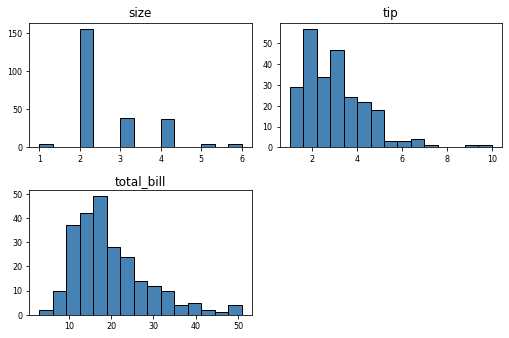

In [21]:
dfTips.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0 , 1.2, 1.2))

In [22]:
sns.__version__

'0.9.0'

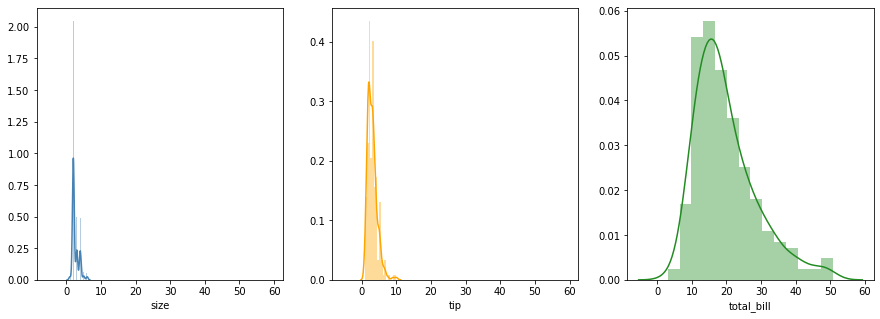

In [23]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.distplot(dfTips['size'], color='steelblue', ax=axes[0])
sns.distplot(dfTips['tip'], color='orange', ax=axes[1])
sns.distplot(dfTips['total_bill'], color='forestgreen', ax=axes[2])

In [24]:
dfTips['tip_perc'] = 100*dfTips['tip']/dfTips['total_bill']
dfTips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_perc'],
      dtype='object')

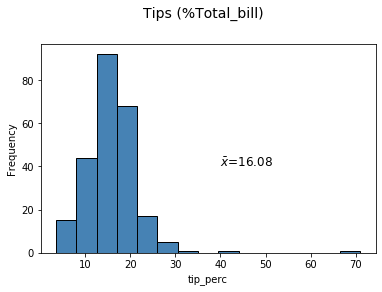

In [25]:
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Tips (%Total_bill)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("tip_perc")
ax.set_ylabel("Frequency")
ax.text(40, 40, r'$\bar{x}$='+str(round(dfTips['tip_perc'].mean(), 2)), fontsize=12)
freq, bins, patches = ax.hist(dfTips['tip_perc'], color='steelblue', bins=15, edgecolor='black', linewidth=1.0)

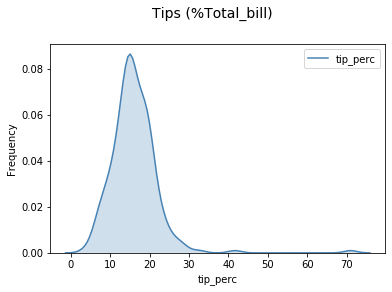

In [26]:
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Tips (%Total_bill)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("tip_perc")
ax.set_ylabel("Frequency")
sns.kdeplot(dfTips['tip_perc'], ax=ax, shade=True, color='steelblue')

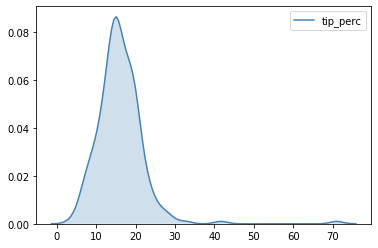

In [27]:
sns.kdeplot(dfTips['tip_perc'], shade=True, color='steelblue')

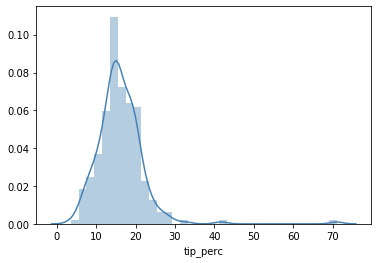

In [28]:
sns.distplot(dfTips['tip_perc'], color='steelblue')

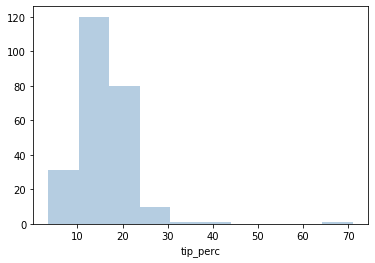

In [29]:
sns.distplot(dfTips['tip_perc'], kde=False, color='steelblue', bins=10)

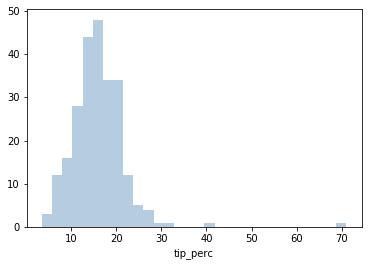

In [30]:
sns.distplot(dfTips['tip_perc'], kde=False, color='steelblue', bins=30)

### Categorías

In [31]:
pd.DataFrame(dfTips.sex.value_counts())

,sex
Male,157
Female,87


In [32]:
pd.DataFrame(dfTips.sex.value_counts(normalize=True))

,sex
Male,0.64
Female,0.36


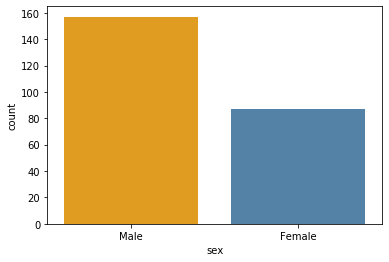

In [33]:
sns.countplot(x='sex', data=dfTips, palette=['orange', 'steelblue'])

In [34]:
dfTipsFemale = dfTips.query('sex == "Female"')
dfTipsMale = dfTips.query('sex == "Male"')

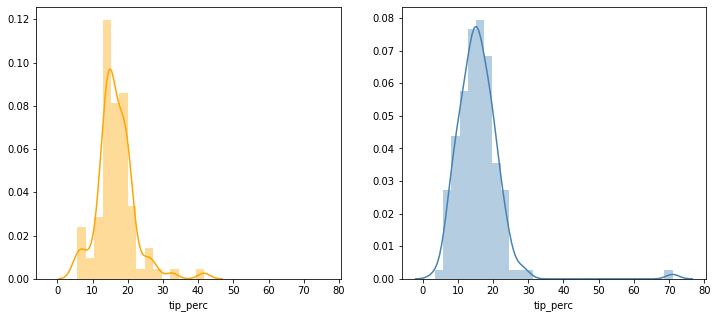

In [35]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.distplot(dfTipsFemale['tip_perc'], color='orange', ax=axes[0])
sns.distplot(dfTipsMale['tip_perc'], color='steelblue', ax=axes[1])

In [36]:
from scipy.stats import ttest_ind
ttest_ind(dfTipsFemale['tip_perc'], dfTipsMale['tip_perc'])

Ttest_indResult(statistic=1.0833972270478005, pvalue=0.2797103849605485)

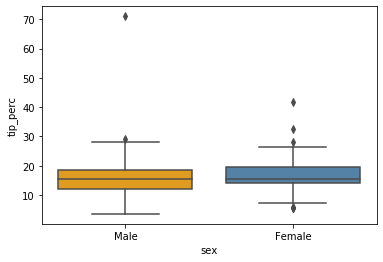

In [37]:
sns.boxplot("sex", "tip_perc", data=dfTips, palette=['orange', "steelblue"])

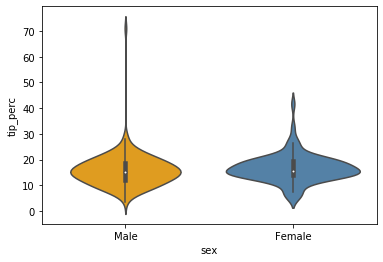

In [38]:
sns.violinplot("sex", "tip_perc", data=dfTips, palette=['orange', "steelblue"])

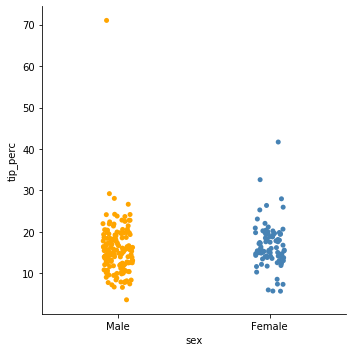

In [39]:
sns.catplot("sex", "tip_perc", data=dfTips, palette=['orange', "steelblue"])

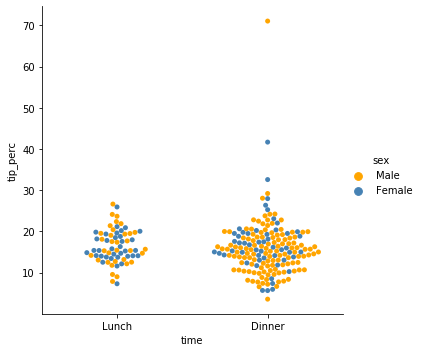

In [40]:
sns.catplot(x="time", y="tip_perc", hue='sex', data=dfTips, palette=['orange', "steelblue"], kind='swarm')

In [41]:
dfTipsDinner = dfTips.query('time == "Dinner"')
dfTipsLunch = dfTips.query('time == "Lunch"')
from scipy.stats import ttest_ind
ttest_ind(dfTipsDinner['tip_perc'], dfTipsLunch['tip_perc'])

Ttest_indResult(statistic=-0.5278867814179381, pvalue=0.5980616074405454)

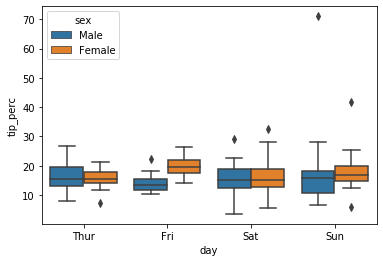

In [42]:
sns.boxplot('day', 'tip_perc', 'sex', data=dfTips)

In [43]:
dfTipsFemaleFri = dfTips.query('sex == "Female"').query('day == "Fri"')
dfTipsMaleFri = dfTips.query('sex == "Male"').query('day == "Fri"')
from scipy.stats import ttest_ind
ttest_ind(dfTipsFemaleFri['tip_perc'], dfTipsMaleFri['tip_perc'])

Ttest_indResult(statistic=3.114352270662731, pvalue=0.0063074821318122075)

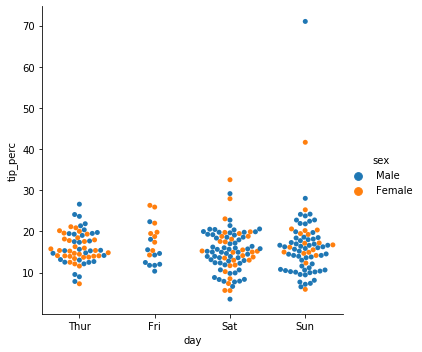

In [44]:
sns.catplot("day", "tip_perc", "sex", data=dfTips, kind="swarm")

## Análisis Multivariable

In [45]:
dfTips.corr()

,total_bill,tip,size,tip_perc
total_bill,1.00,0.68,0.60,-0.34
tip,0.68,1.00,0.49,0.34
size,0.60,0.49,1.00,-0.14
tip_perc,-0.34,0.34,-0.14,1.00


In [46]:
dfTips['smoker_boolean'] = np.where(dfTips['smoker']=='Yes',1,0)
dfTips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc,smoker_boolean
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,0
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,0
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,0
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,0
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,0


In [47]:
dfTips.corr()

,total_bill,tip,size,tip_perc,smoker_boolean
total_bill,1.00,0.68,0.60,-0.34,0.09
tip,0.68,1.00,0.49,0.34,0.01
size,0.60,0.49,1.00,-0.14,-0.13
tip_perc,-0.34,0.34,-0.14,1.00,0.03
smoker_boolean,0.09,0.01,-0.13,0.03,1.00


In [48]:
dfTips = dfTips.drop('smoker_boolean', axis = 1)
dfTips.head(n=2)

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05


Text(0.5, 0.98, 'Tips Variables Correlation Heatmap')

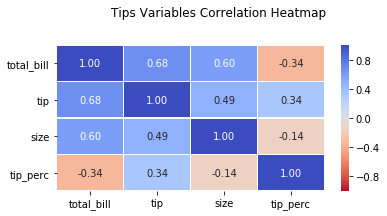

In [49]:
f, ax = plt.subplots(figsize=(6, 3))
corr = dfTips.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm_r",
                fmt='0.2f', linewidths=0.05, vmin=-1, vmax=1)
f.subplots_adjust(top=0.8)
f.suptitle('Tips Variables Correlation Heatmap')


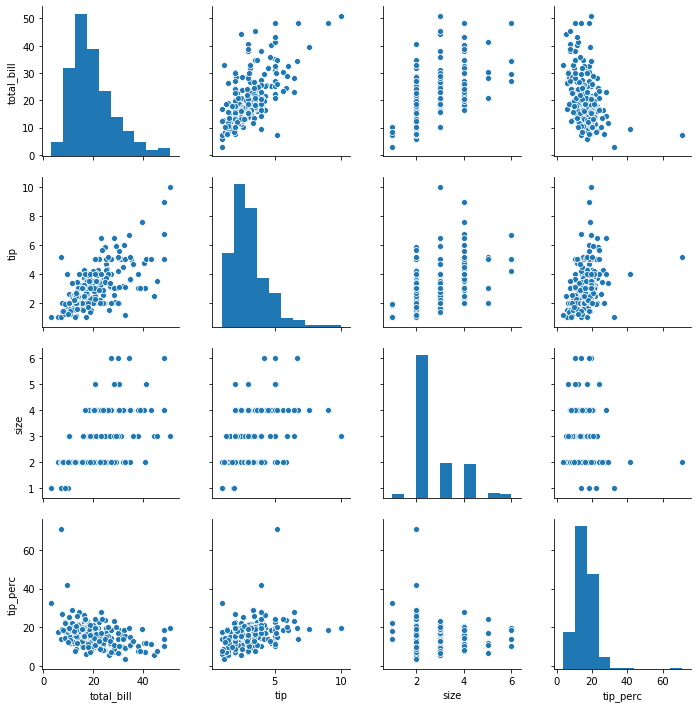

In [50]:
sns.pairplot(dfTips, height=2.5)

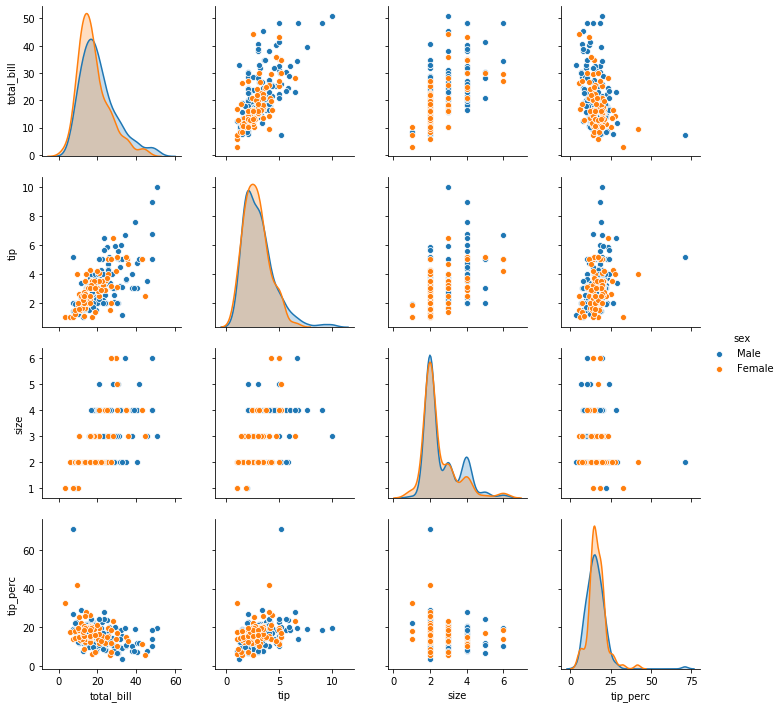

In [51]:
sns.pairplot(dfTips, height=2.5, hue='sex')

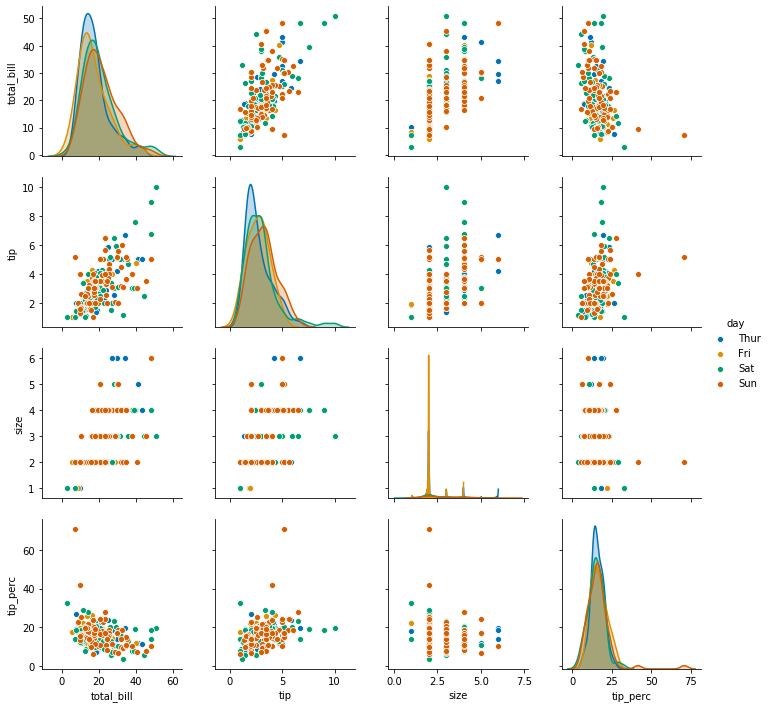

In [52]:
sns.pairplot(dfTips, hue='day', height=2.5, palette='colorblind')
#palette=deep, muted, pastel, bright, dark

## Coordenadas paralelas

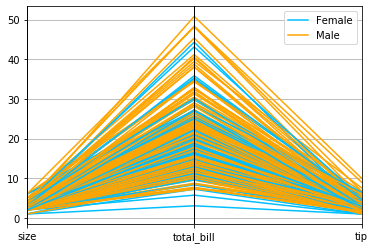

In [53]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(dfTips[['size', 'total_bill', 'tip', 'sex']],'sex', color=('deepskyblue', 'orange'))

## Dos variables cuantitativas

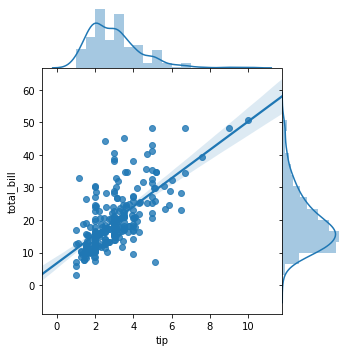

In [55]:
sns.jointplot(x='tip', y='total_bill', data=dfTips, kind='reg', space=0, height=5, ratio=4)

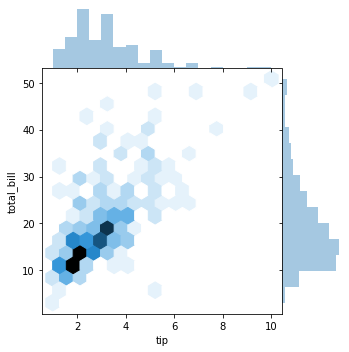

In [56]:
sns.jointplot(x='tip', y='total_bill', data=dfTips, kind='hex', space=0, height=5, ratio=4)

## Variables cuantitativas y categorías

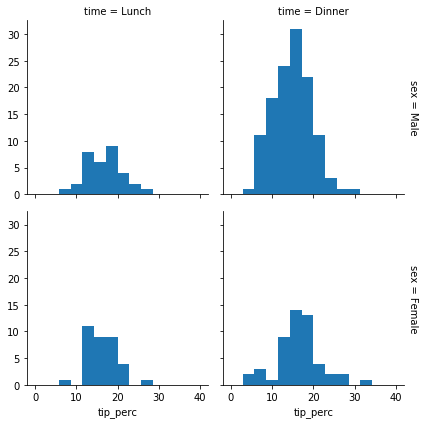

In [58]:
grid = sns.FacetGrid(dfTips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_perc', bins=np.linspace(0,40,15))

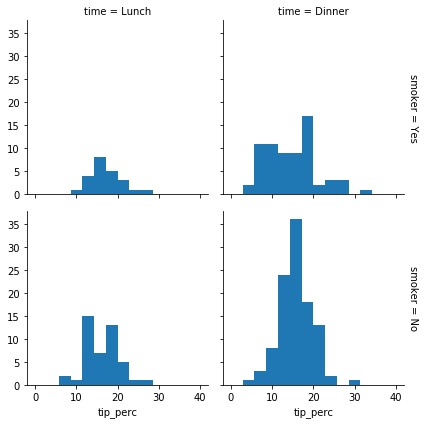

In [59]:
grid = sns.FacetGrid(dfTips, row='smoker', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_perc', bins=np.linspace(0,40,15))

## Box plots

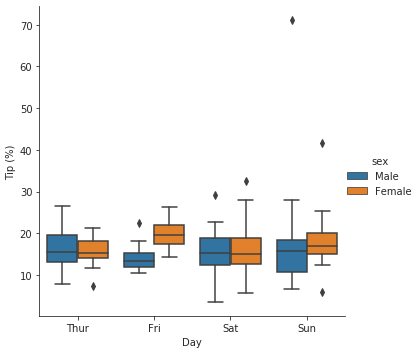

In [60]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day', 'tip_perc','sex',data=dfTips, kind='box')
    g.set_axis_labels('Day', 'Tip (%)')

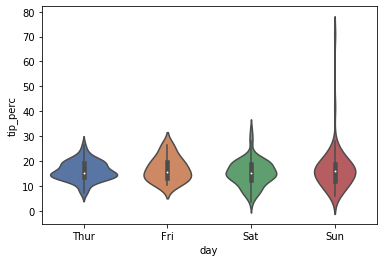

In [61]:
sns.violinplot(x='day', y='tip_perc',data=dfTips, palette='deep')

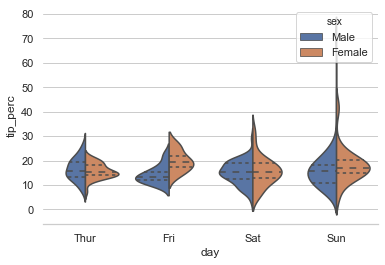

In [64]:
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.violinplot(x='day', y='tip_perc',hue='sex', split=True, inner='quart', data=dfTips, palette='deep')
sns.despine(left=True)

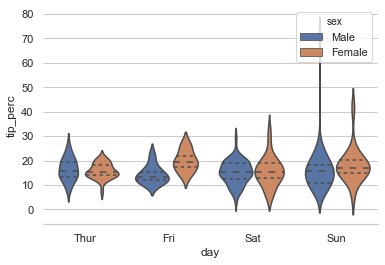

In [65]:
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.violinplot(x='day', y='tip_perc',hue='sex', inner='quart', data=dfTips, palette='deep')
sns.despine(left=True)

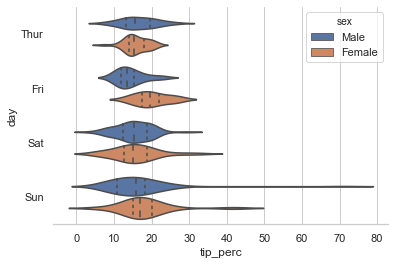

In [66]:
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.violinplot(y='day', x='tip_perc',hue='sex', inner='quart', data=dfTips, palette='deep')
sns.despine(left=True)

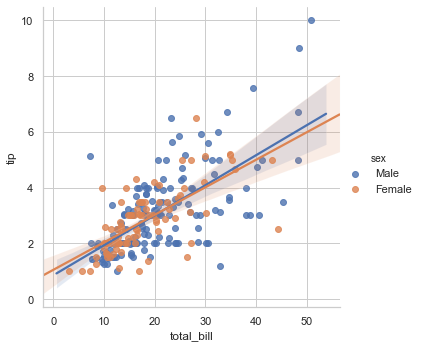

In [67]:
sns.lmplot(x='total_bill', y='tip', hue='sex', palette='deep', data=dfTips, fit_reg=True, legend=True)

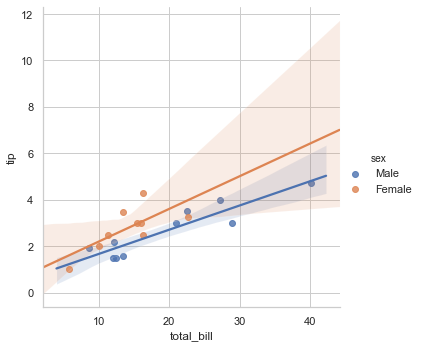

In [68]:
sns.lmplot(x='total_bill', y='tip', hue='sex', palette='deep', data=dfTips.query('day == "Fri"'), fit_reg=True, legend=True)